In [40]:
import json
from pathlib import Path

import numpy as np
import pandas as pd

np.random.seed(666)


def create_fake_data(num_sample: int = 50, num_rep: int = 5):
    """create fake tsv files and a fake json file that minics LIMS query result; each tsv file is coresponding to one sample."""

    def _activity(x, a, b, e):
        return a * x + b + e

    def _retrive_sample():
        for sample in df_raw.groupby("sample"):
            yield sample

    temp_path = Path("tmp")
    temp_path.mkdir(parents=True, exist_ok=True)

    ph = np.random.normal(loc=0, scale=0.2, size=num_sample * num_rep * 2) + 7
    slope = np.random.normal(loc=0.5, scale=0.2, size=num_sample)
    factor = np.array([1] * num_rep + [0] * num_rep)
    intercept = np.transpose(
        np.random.gamma(shape=1.2, scale=5, size=num_sample * num_rep * 2).reshape(num_sample, num_rep * 2) * factor
    )
    error = np.random.normal(loc=0, scale=0.5, size=num_sample * num_rep * 2).reshape(num_rep * 2, num_sample) + 3

    df_raw = (
        pd.DataFrame(
            _activity(x=ph.reshape(num_rep * 2, num_sample), a=slope, b=intercept, e=error),
            index=factor,
            columns=[f"sample{i+1}" for i in range(num_sample)],
        )
        .stack()
        .reset_index()
    )
    df_raw.columns = ["treatment", "sample", "activity"]
    df_raw["ph"] = ph
    df_raw = df_raw.set_index(["sample"])

    for sample in _retrive_sample():
        path = temp_path / f"samples/{sample[0]}/{sample[0]}.tsv"
        path.parent.mkdir(parents=True, exist_ok=True)
        sample[1][["treatment", "ph", "activity"]].to_csv(path, sep="\t", index=False)



In [42]:
[f"sample{i+1}" for i in range(10)]

['sample1',
 'sample2',
 'sample3',
 'sample4',
 'sample5',
 'sample6',
 'sample7',
 'sample8',
 'sample9',
 'sample10']

In [ ]:
[s.name for s in Path().glob("tmp/samples/*")]

In [43]:
def _activity(x, a, b, e):
    return a * x + b + e

def _retrive_sample():
    for sample in df_raw.groupby("sample"):
        yield sample

temp_path = Path("tmp")
temp_path.mkdir(parents=True, exist_ok=True)

ph = np.random.normal(loc=0, scale=0.2, size=num_sample * num_rep * 2) + 7
slope = np.random.normal(loc=1., scale=0.5, size=num_sample)
factor = np.array([1] * num_rep + [0] * num_rep)
intercept = np.transpose(
    np.random.gamma(shape=1.2, scale=5, size=num_sample * num_rep * 2).reshape(num_sample, num_rep * 2) * factor
)
error = np.random.normal(loc=0, scale=0.5, size=num_sample * num_rep * 2).reshape(num_rep * 2, num_sample) + 3

df_raw = (
    pd.DataFrame(
        _activity(x=ph.reshape(num_rep * 2, num_sample), a=slope, b=intercept, e=error),
        index=factor,
        columns=[f"sample{i+1}" for i in range(num_sample)],
    )
    .stack()
    .reset_index()
)
df_raw.columns = ["treatment", "sample", "activity"]
df_raw["ph"] = ph
df_raw = df_raw.set_index(["sample"])

NameError: name 'snakemake' is not defined

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

import json
from pathlib import Path

import numpy as np
import pandas as pd

np.random.seed(666)


In [112]:
num_sample = 50
num_rep = 5

In [113]:
def _activity(x, a, b, e):
    return a * x + b + e

def _retrive_sample():
    for sample in df_raw.groupby("sample"):
        yield sample


In [169]:
ph = np.random.normal(loc=0, scale=0.2, size=num_sample * num_rep * 2) + 7
slope = np.random.normal(loc=1, scale=2, size=num_sample)
factor = np.array([1] * num_rep + [0] * num_rep)
intercept = np.transpose(
    np.random.gamma(shape=0.8, scale=1.2, size=num_sample * num_rep * 2).reshape(num_sample, num_rep * 2) * factor
)
error = np.random.normal(loc=0, scale=0.5, size=num_sample * num_rep * 2).reshape(num_rep * 2, num_sample) + 7

df_raw = (
    pd.DataFrame(
        _activity(x=ph.reshape(num_rep * 2, num_sample), a=slope, b=intercept, e=error),
        index=factor,
        columns=[f"sample{i+1}" for i in range(num_sample)],
    )
    .stack()
    .reset_index()
)
df_raw.columns = ["treatment", "sample", "activity"]
df_raw["ph"] = ph
df_raw = df_raw.set_index(["sample"])

<AxesSubplot:ylabel='Count'>

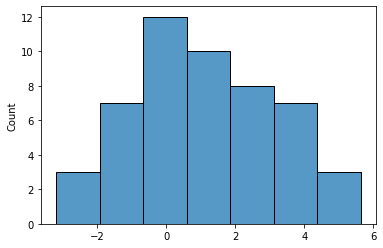

In [170]:
sns.histplot(slope)

<AxesSubplot:ylabel='Count'>

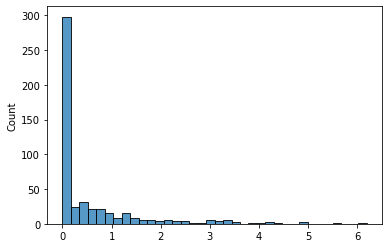

In [171]:
sns.histplot(intercept.reshape(num_sample * num_rep * 2,))

In [172]:
import numpy as np
import pandas as pd
from pingouin import ancova
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ttest_ind

In [176]:
df_query.p_enhancer.values


array([0.00814415])

In [183]:
df = df_raw.loc['sample8']

In [201]:
lm = ols("activity ~ ph", df).fit()
y_hat = lm.predict(df["ph"])
df['residual'] = df["activity"].values - y_hat.values
# df['residual2'] = df["activity"] - df["activity"].mean()

/tmp/ipykernel_47269/1432279934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual'] = df["activity"].values - y_hat.values


In [189]:
t_test_result_1 = ttest_ind(
            x1=df.query("treatment==1")["residual"],
            x2=df.query("treatment==0")["residual"],
            alternative="larger",
        )

In [190]:
t_test_result_1

(4.875573890921558, 0.0006156212810557123, 8.0)

In [197]:
 ttest_ind(
            x1=df.query("treatment==1")["residual2"],
            x2=df.query("treatment==0")["residual2"],
            alternative="larger",
        )

(2.15227511104419, 0.03177482682308482, 8.0)

In [186]:
df

,treatment,activity,ph,residure
sample,,,,
sample8,1,35.085204,7.103546,-0.066756
sample8,1,33.590222,6.859007,0.326823
sample8,1,39.700526,7.370970,2.483267
sample8,1,38.134773,7.154502,2.589283
sample8,1,35.283697,6.861352,2.002186
sample8,0,33.427047,6.994698,-0.884284
sample8,0,34.064702,7.178521,-1.666287
sample8,0,33.021884,7.073182,-1.895579
sample8,0,33.912415,7.191286,-1.917161


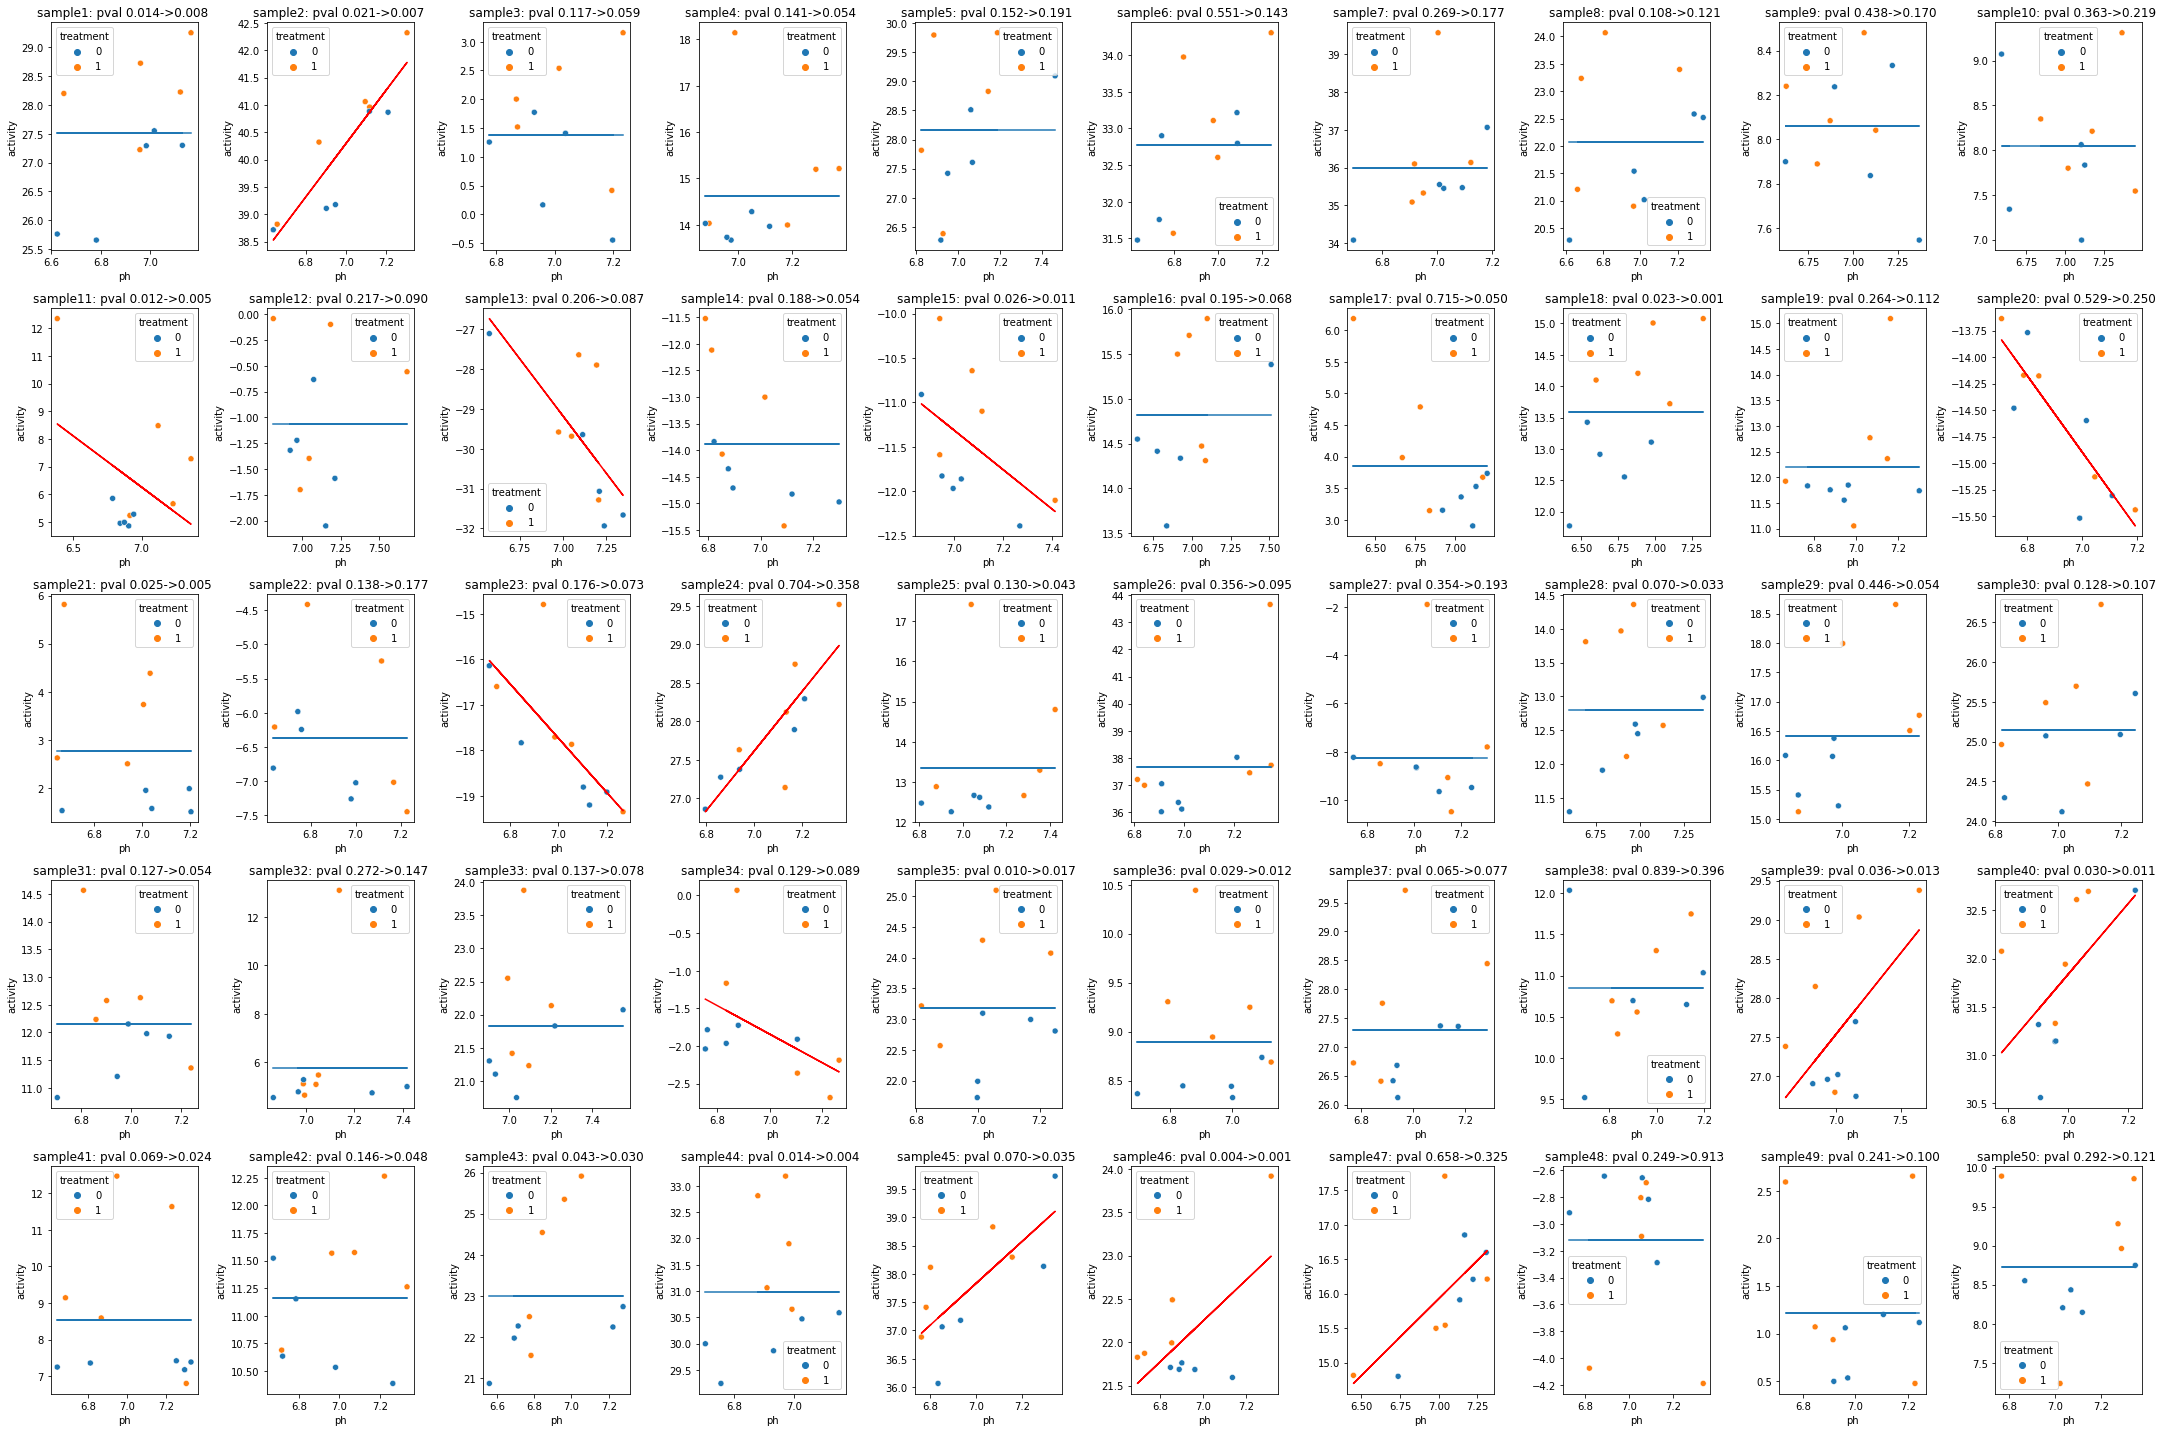

In [204]:
f, ax = plt.subplots(5,10, figsize = (30,20))
ax = ax.ravel()
for i,sample in enumerate(df_raw.index.unique()):
    df = pd.read_table(f"tmp/samples/{sample}/{sample}.tsv")
    covar_stats = ancova(data=df, dv="activity", between="treatment", covar="ph")
    p_ph = covar_stats.query('Source == "ph"')["p-unc"].values[0]
    p_treat = covar_stats.query('Source == "treatment"')["p-unc"].values[0]
    lm = ols("activity ~ ph", df).fit()
    y_hat = lm.predict(df["ph"])
    
    sns.scatterplot(x = 'ph', y = 'activity', hue = 'treatment', data = df, ax = ax[i])
    if p_ph<0.05:
        ax[i].plot(df["ph"],y_hat, "r-")
    else:
        ax[i].plot(df["ph"],[df["activity"].mean()]*10, "-")
    conn = init_conn(f"tmp/samples/{sample}/sqlite.db")
    sql_get = """SELECT * from pep_stats """
    with conn:
        df_query = read_sql_query("SELECT * from pep_stats", conn)
    
    ax[i].set_title("{0}: pval {2:.3f}->{3:.3f} ".format(sample,p_ph, p_treat, df_query.p_enhancer.values[0]))
plt.tight_layout()

In [119]:
from pep_detective.src.conn import get_db, init_conn

In [120]:
import sqlite3
from pandas import read_sql_query
from pep_detective.src.ancova import AncovaResult


def init_conn(db: str) -> sqlite3.Connection:
    """create a database connection"""
    conn = None
    try:
        conn = sqlite3.connect(db)
    except sqlite3.Error as e:
        print(e)

    return conn

In [193]:
conn = init_conn("tmp/samples/sample8/sqlite.db")

In [194]:
sql_get = """SELECT * from pep_stats """
with conn:
    df_query = read_sql_query("SELECT * from pep_stats", conn)

In [195]:
df_query.p_enhancer

0    0.121435
Name: p_enhancer, dtype: float64

In [163]:
df_query["ph_covar"] = df_query["ph_covar"].apply(lambda x: False if x==b'\x00' else True)  # convert bit back to bool

In [164]:
df_query

,sample_id,ph_covar,p_enhancer,p_suppressor
0,sample3,False,0.059061,0.940939


In [ ]:
snakemake --configfile config.yaml --dag all | dot -Tsvg > dag2.svg
